In [6]:
import pandas as pd
from src.models.SVMClassifier import SVMClassifier
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
import numpy as np

Undersampled dataset without outliers

In [7]:
SVM = SVMClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/without_outliers/train.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/without_outliers/test.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [8]:
clf = SVMClassifier()
parameters = {
    'C': np.logspace(-3, 2, 10),
    'gamma': np.logspace(-3, 2, 10),
    'kernel': ['rbf','linear','poly','sigmoid'],
    'probability': [True],
}
clf.hyperparameter_tuning(X_train, y_train, parameters, 'halving-random', 3,n_jobs=4)

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 400 is smaller than n_iter=4266. Running 400 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Inference time : 2.588691810766856e-06 seconds
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11605
           1       0.96      0.88      0.92      3719
           2       0.98      1.00      0.99      3876

    accuracy                           0.96     19200
   macro avg       0.96      0.95      0.96     19200
weighted avg       0.96      0.96      0.96     19200

auc score for class 0:  0.9709870578020926
auc score for class 1:  0.9640410117518826
auc score for class 2:  0.997856616990447


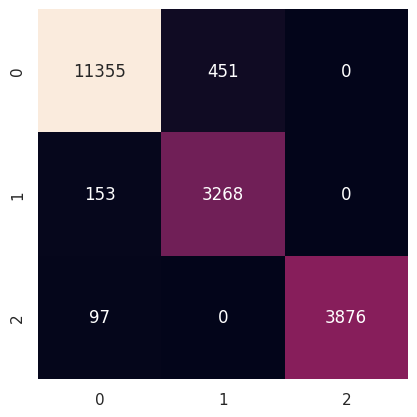

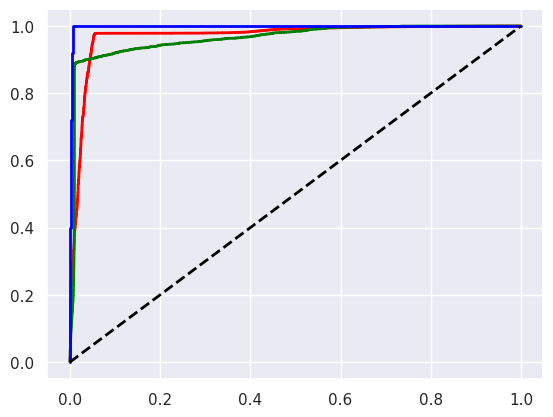

In [9]:
clf.evaluate(X_test, y_test)

In [10]:
path = '../models/SVM/'
name = 'SVM_without_outliers'
clf.save(new_name=name, path=path)